In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [63]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **DISCOVERING THE DATSET AND ITS PROPERTIES**

In [64]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [65]:
df.shape

(150, 6)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [67]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **DATA CLEANING AND DATA VISUALIZATION**

In [68]:
#here id column is of no use its just the same as the index of that row. so let us drop that column from dataset
df=df.drop('Id',axis=1)

In [69]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.isnull().sum() #there are not null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [71]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

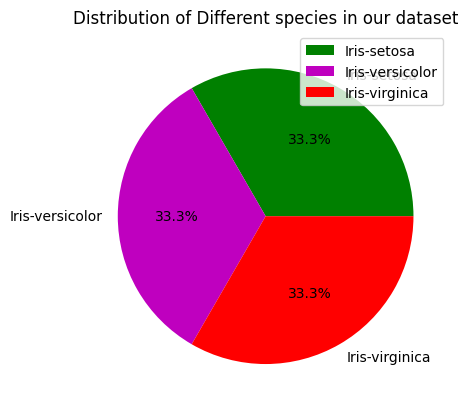

In [72]:
a=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['g','m','r']
plt.pie(df['Species'].value_counts(),labels=a,colors=colors,autopct = "%1.1f%%")
plt.title("Distribution of Different species in our dataset")
plt.legend()
plt.show()

Text(0, 0.5, 'Values in PetalWidthCm column')

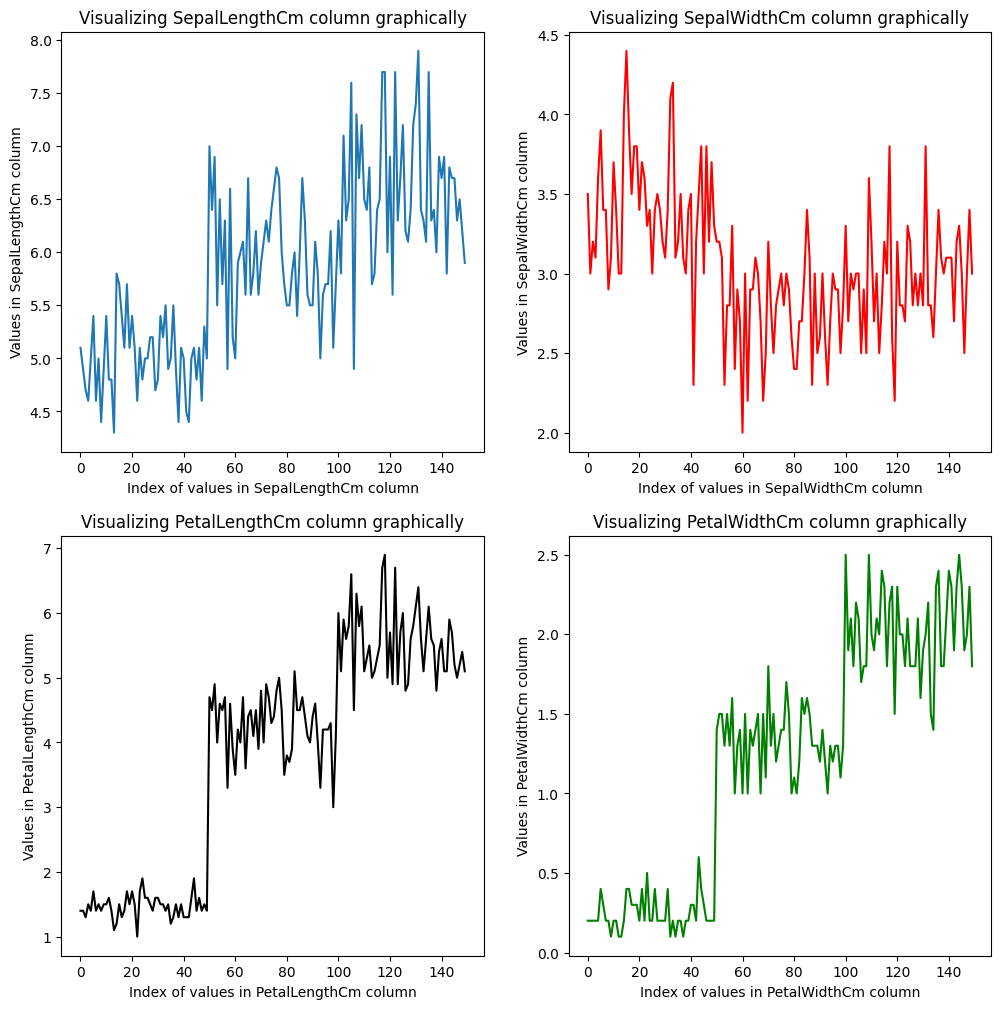

In [73]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
ax[0][0].plot(df['SepalLengthCm'])
ax[0][0].set_title("Visualizing SepalLengthCm column graphically")
ax[0][0].set_xlabel("Index of values in SepalLengthCm column")
ax[0][0].set_ylabel("Values in SepalLengthCm column")
ax[0][1].plot(df['SepalWidthCm'],'r')
ax[0][1].set_title("Visualizing SepalWidthCm column graphically")
ax[0][1].set_xlabel("Index of values in SepalWidthCm column")
ax[0][1].set_ylabel("Values in SepalWidthCm column")
ax[1][0].plot(df['PetalLengthCm'],'k-')
ax[1][0].set_title("Visualizing PetalLengthCm column graphically")
ax[1][0].set_xlabel("Index of values in PetalLengthCm column")
ax[1][0].set_ylabel("Values in PetalLengthCm column")
ax[1][1].plot(df['PetalWidthCm'],'g-')
ax[1][1].set_title("Visualizing PetalWidthCm column graphically")
ax[1][1].set_xlabel("Index of values in PetalWidthCm column")
ax[1][1].set_ylabel("Values in PetalWidthCm column")

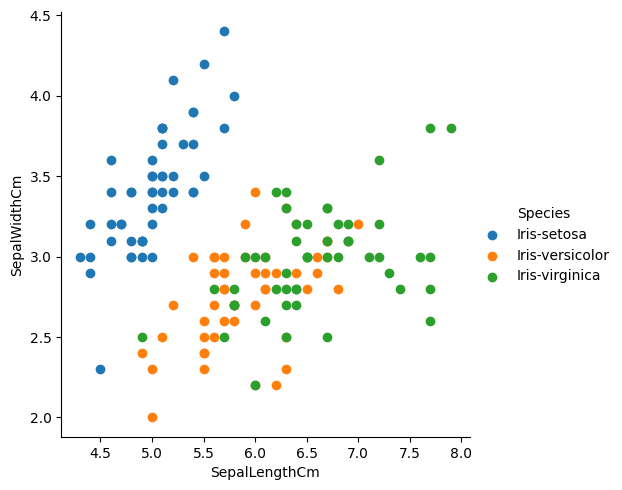

In [74]:
sns.FacetGrid(data=df,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

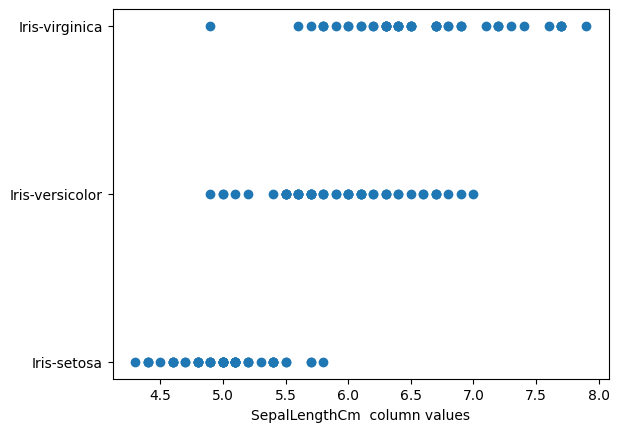

In [75]:
plt.scatter(df['SepalLengthCm'],df['Species'])
plt.xlabel("SepalLengthCm  column values")
plt.show()

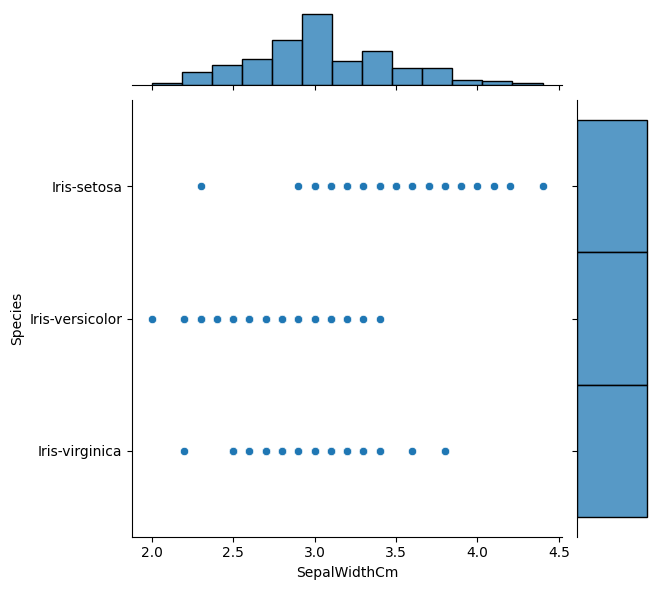

In [76]:
sns.jointplot(x= 'SepalWidthCm',y ='Species',data=df)

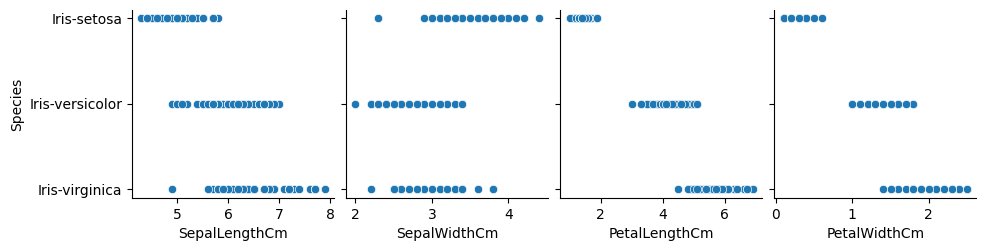

In [77]:
sns.pairplot(
 df,
 x_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
 y_vars=["Species"],
)


In [78]:
df.corr()

<ipython-input-78-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-79-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


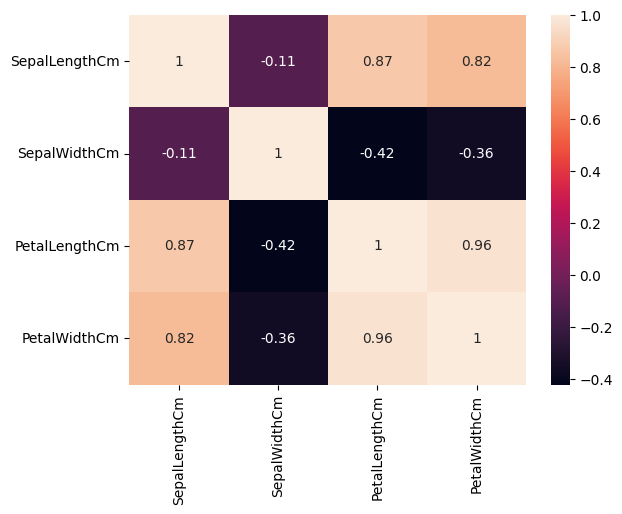

In [79]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Label encoding the Target Variable

In [80]:
le= LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [81]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# DIVIDING DEPENDENT AND INDEPENDENT VARIABLES AND THEN TO TEST AND TRAIN DATA

In [83]:
x=df.drop('Species',axis=1)
y=df['Species']

In [84]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [86]:
x.shape

(150, 4)

In [87]:
y.shape

(150,)

In [88]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [90]:
standardisedData = scaler.transform(x)
standardisedData

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [91]:
x=standardisedData

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
print("Xtrain shape: ",xtrain.shape )
print("Xtest shape: ",xtest.shape )
print("ytrain shape: ",ytrain.shape )
print("ytest shape: ",ytest.shape )

Xtrain shape:  (120, 4)
Xtest shape:  (30, 4)
ytrain shape:  (120,)
ytest shape:  (30,)


# SUPERVISED LEARNING MODELS[CLASSIFICATION] BUILDING

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

LOGISTIC REGRESSION

In [95]:
model_1=LogisticRegression()
model_1.fit(xtrain,ytrain)

LogisticRegression()

In [104]:
train_pred=model_1.predict(xtrain)
accuracy_train= accuracy_score(ytrain, train_pred)
accuracy_train

0.9666666666666667

In [105]:
test_pred1=model_1.predict(xtest)
acc_mod1= accuracy_score(ytest, test_pred1)
acc_mod1

1.0

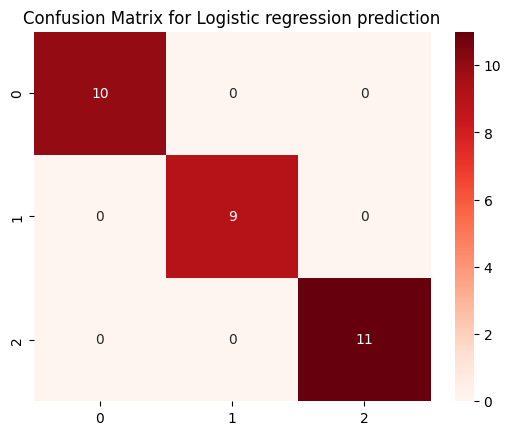

In [107]:
ConfusionMatrix_lr = confusion_matrix(ytest, test_pred1)
matrix_lr=sns.heatmap(ConfusionMatrix_lr,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Logistic regression prediction')
plt.show(matrix_lr)
plt.show()

DECISION TREE CLASSIFIER

In [99]:
model_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_2.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [108]:
test_pred2=model_2.predict(xtest)
acc_mod2= accuracy_score(ytest, test_pred2)
acc_mod2

1.0

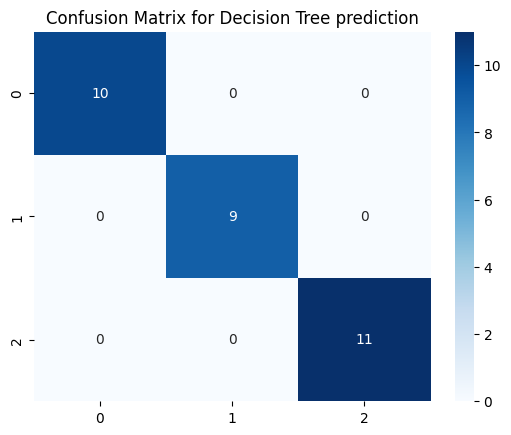

In [111]:
ConfusionMatrix_dt = confusion_matrix(ytest, test_pred2)
matrix_dt=sns.heatmap(ConfusionMatrix_dt,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree prediction')
plt.show(matrix_dt)
plt.show()

RANDOM FOREST CLASSIFIER

In [114]:
model_3 = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,random_state =42,max_leaf_nodes = 30)
model_3.fit(xtrain, ytrain)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [115]:
test_pred3=model_3.predict(xtest)
acc_mod3= accuracy_score(ytest, test_pred3)
acc_mod3

1.0

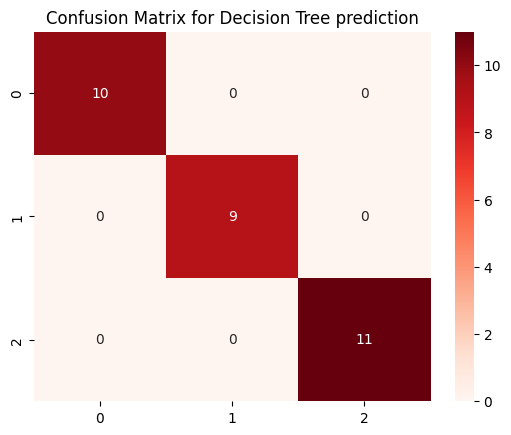

In [116]:
ConfusionMatrix_rf = confusion_matrix(ytest, test_pred3)
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Decision Tree prediction')
plt.show(matrix_rf)
plt.show()

SVM MODEL

In [117]:
model_4 = SVC(random_state = 1)
model_4.fit(xtrain,ytrain)

SVC(random_state=1)

In [118]:
test_pred4=model_4.predict(xtest)
acc_mod4= accuracy_score(ytest, test_pred4)
acc_mod4

1.0

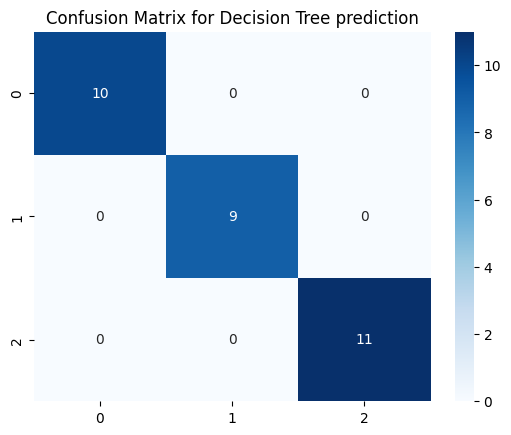

In [119]:
ConfusionMatrix_svm= confusion_matrix(ytest, test_pred4)
matrix_svm=sns.heatmap(ConfusionMatrix_svm,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree prediction')
plt.show(matrix_svm)
plt.show()

KNN model

In [121]:
model_5 = KNeighborsClassifier(n_neighbors = 11)
model_5.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=11)

In [122]:
test_pred5=model_5.predict(xtest)
acc_mod5= accuracy_score(ytest, test_pred5)
acc_mod5

1.0

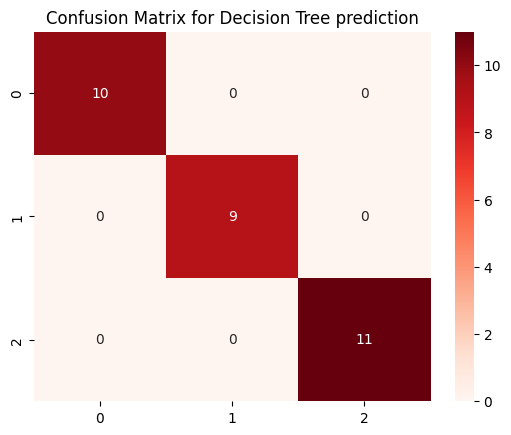

In [123]:
ConfusionMatrix_knn= confusion_matrix(ytest, test_pred5)
matrix_knn=sns.heatmap(ConfusionMatrix_knn,annot=True,cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Decision Tree prediction')
plt.show(matrix_knn)
plt.show()

## UNSUPERVISED LEARNING MODELS

In [125]:
new_df = df.iloc[:,:-1]
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [126]:
from sklearn import cluster

In [129]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [130]:
error

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.879287878787892,
 26.04820224804435]

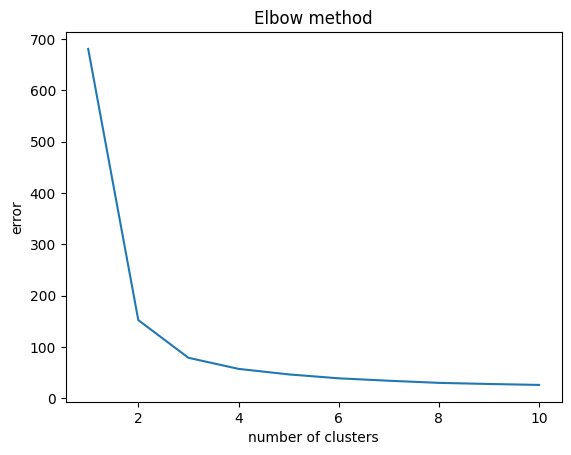

In [131]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [133]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [134]:
pred = km_model.predict(new_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [135]:
new_df['predicted_species']=pred
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted_species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

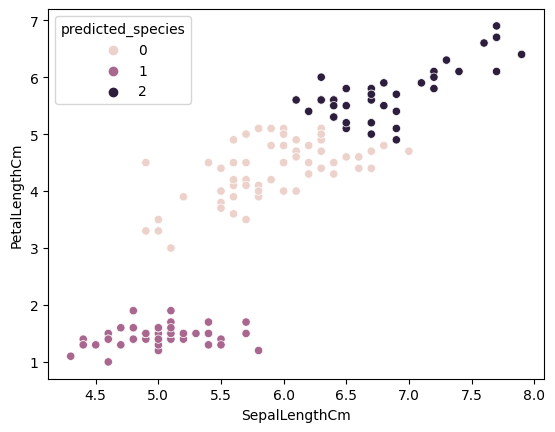

In [138]:
sns.scatterplot(data = new_df, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'predicted_species')

In [140]:
km_model.inertia_

78.940841426146

In [141]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [142]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [143]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [144]:
model = model.fit(x)

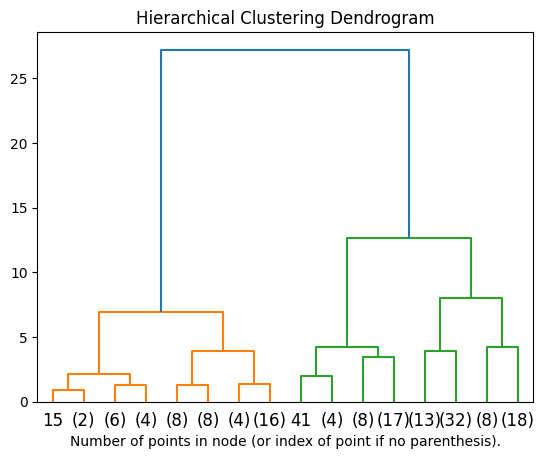

In [145]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [146]:
import pickle
pickle.dump(model_3,open('IRIS FLOWER CLASSIFICATION.pkl','wb'))